# Emergency vs Non-Emergency Vehicle Classification

Fatalities due to traffic delays of emergency vehicles such as ambulance & fire brigade is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic. So differentiating a vehicle into an emergency and non emergency category can be an important component in traffic monitoring as well as self drive car systems as reaching on time to their destination is critical for these services.

In this problem, you will be working on classifying vehicle images as either belonging to the emergency vehicle or non-emergency vehicle category. For the same, you are provided with the train and the test dataset. Emergency vehicles usually includes police cars, ambulance and fire brigades

Total training images - 1646

    Emergency - 681 (~41%)
    Non-emergency - 965

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

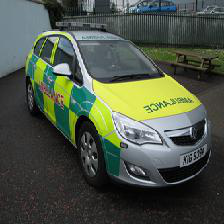

In [9]:
#import pil
from PIL import Image
loca = 'C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV CompVis emergency classification/train/images'
Image.open('C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV CompVis emergency classification/train/images/0.jpg')

In [10]:
import pandas as pd
image_direc = pd.read_csv('C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV CompVis emergency classification/train/train.csv')

In [11]:
image_direc.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [14]:
import os

base_dir = 'C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV CompVis emergency classification/train/images'
files = os.listdir(base_dir)

In [15]:
for f in files:
    print(f)

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg
1005.jpg
1006.jpg
1007.jpg
1008.jpg
1009.jpg
101.jpg
1010.jpg
1011.jpg
1012.jpg
1013.jpg
1014.jpg
1015.jpg
1016.jpg
1017.jpg
1018.jpg
1019.jpg
102.jpg
1020.jpg
1021.jpg
1022.jpg
1023.jpg
1024.jpg
1025.jpg
1026.jpg
1027.jpg
1028.jpg
1029.jpg
103.jpg
1030.jpg
1031.jpg
1032.jpg
1033.jpg
1034.jpg
1035.jpg
1036.jpg
1037.jpg
1038.jpg
1039.jpg
104.jpg
1040.jpg
1041.jpg
1042.jpg
1043.jpg
1044.jpg
1045.jpg
1046.jpg
1047.jpg
1048.jpg
1049.jpg
105.jpg
1050.jpg
1051.jpg
1052.jpg
1053.jpg
1054.jpg
1055.jpg
1056.jpg
1057.jpg
1058.jpg
1059.jpg
106.jpg
1060.jpg
1061.jpg
1062.jpg
1063.jpg
1064.jpg
1065.jpg
1066.jpg
1067.jpg
1068.jpg
1069.jpg
107.jpg
1070.jpg
1071.jpg
1072.jpg
1073.jpg
1074.jpg
1075.jpg
1076.jpg
1077.jpg
1078.jpg
1079.jpg
108.jpg
1080.jpg
1081.jpg
1082.jpg
1083.jpg
1084.jpg
1085.jpg
1086.jpg
1087.jpg
1088.jpg
1089.jpg
109.jpg
1090.jpg
1091.jpg
1092.jpg
1093.jpg
1094.jpg
1095.jpg
1096.jpg
1097.jpg
1098.jpg
1099.jpg
1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2

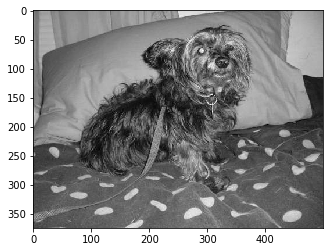

In [9]:
DATADIR = "C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/Stanford Cat Dog/train"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # This gets us into the path to cat and dog folder
    for img in os.listdir(path):        # Access each image in the folder
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # Convert each image to array then greyscale
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [10]:
print(img_array)

[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


In [11]:
img_array.shape

(375, 499)

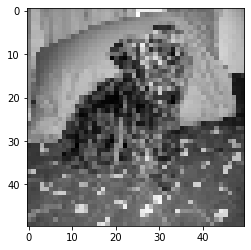

In [17]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [19]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # This gets us into the path to cat and dog folder
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):        # Access each image in the folder
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # Convert each image to array then greyscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [20]:
print(len(training_data))

25000


In [21]:
import random

random.shuffle(training_data)

In [36]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
0
0
1
1
1


In [35]:
for i in training_data:
    print(i[0])
    break

[[222 226 230 ... 242 247 120]
 [224 226 231 ... 243 230 126]
 [218 221 226 ... 242 189 119]
 ...
 [ 76  71  72 ...  74  79  77]
 [ 81  78 125 ...  78  75  74]
 [ 85  93  99 ...  75  78  80]]


In [37]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [38]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [39]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [40]:
X[1]

array([[[118],
        [124],
        [127],
        ...,
        [252],
        [252],
        [252]],

       [[121],
        [128],
        [129],
        ...,
        [252],
        [252],
        [252]],

       [[130],
        [130],
        [134],
        ...,
        [252],
        [252],
        [252]],

       ...,

       [[ 99],
        [111],
        [ 72],
        ...,
        [146],
        [191],
        [196]],

       [[106],
        [138],
        [ 89],
        ...,
        [147],
        [192],
        [193]],

       [[103],
        [139],
        [ 86],
        ...,
        [133],
        [190],
        [191]]], dtype=uint8)

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

#Layer 1
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))  # Not including that "-1" here, as we need only 50x50x1 as input
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Layer 2
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# Layer 3
model.add(Flatten())
model.add(Dense(64))

# Output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy", 
              optimizer = "adam", 
              metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, validation_split = 0.1, )

Train on 22500 samples, validate on 2500 samples
Instructions for updating:
Use tf.cast instead.
22500/22500 [==============================] - 89s 4ms/sample - loss: 0.6101 - acc: 0.6640 - val_loss: 0.6158 - val_acc: 0.6684


## Emergency vehicle classification